In [29]:
import matplotlib as plt
import numpy as np 
import pandas as pd
import os
import sys

# Setup paths
PROJECT_ROOT = os.path.dirname(os.getcwd())
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

FEAT_IMP_PATH = '../results_modelling_feat_imp'
    
import pandas as pd
import numpy as np
import logging

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

In [30]:
def get_feat_imp(folder_path): 
    dfs = []
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, index_col=0)  
        dfs.append(df)  

    combined_df = pd.concat(dfs, axis=0, ignore_index=True)
    return combined_df

In [31]:
df_imps = get_feat_imp(FEAT_IMP_PATH)
df_imps_intersection = df_imps[df_imps['dataset'] == 'Intersection']
df_imps_pData_intersection = df_imps[df_imps['dataset'] == 'pData_Intersection']
df_imps_pData = df_imps[df_imps['dataset'] == 'pData']
df_imps_pData

,feature,value,model_class,dataset
425,GLEASON_SCORE,70.590153,GBoost,pData
426,TISSUE,18.635959,GBoost,pData
427,PRE_OPERATIVE_PSA,8.195472,GBoost,pData
428,AGE,2.578415,GBoost,pData
813,GLEASON_SCORE,0.538171,CoxPH,pData
814,PRE_OPERATIVE_PSA,0.184273,CoxPH,pData
815,TISSUE.FFPE,-0.202020,CoxPH,pData
816,TISSUE.Snap_frozen,0.434701,CoxPH,pData
817,gleason_tstart,-0.137920,CoxPH,pData
2916,AGE,0.000110,RSF,pData


In [32]:
pts_ffpe = pd.read_csv('ProstaTrend_paper.csv', sep=";")  
pts_ffpe = pts_ffpe[pts_ffpe['Signature'] == 'ProstaTrend-ffpe']
pts_ffpe_genes = pts_ffpe['Ensembl_ID']

In [33]:
grouped_intersection = df_imps_intersection.groupby('feature').size().reset_index(name='count')

df_imps_pData_intersection['rank'] = df_imps_pData_intersection.groupby('model_class')['value'].rank(method='dense', ascending=False).astype(int)
df_imps_pData_intersection = df_imps_pData_intersection.sort_values(by=['model_class', 'value'], ascending=[False, False])
grouped_intersection_pData = df_imps_pData_intersection.groupby('feature').agg(
    count=('rank', 'count'),
        highest_rank=('rank', 'min'),
        lowest_rank=('rank', 'max')
).reset_index()

df_imps_pData['rank'] = df_imps_pData.groupby('model_class')['value'].rank(method='dense', ascending=False).astype(int)
df_imps_pData = df_imps_pData.sort_values(by=['model_class', 'value'], ascending=[False, False])
grouped_pData = df_imps_pData.groupby('feature').agg(
    count=('rank', 'count'),
        highest_rank=('rank', 'min'),
        lowest_rank=('rank', 'max')
).reset_index()

C:\Users\laeti\AppData\Local\Temp\ipykernel_24892\2868273724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imps_pData_intersection['rank'] = df_imps_pData_intersection.groupby('model_class')['value'].rank(method='dense', ascending=False).astype(int)
C:\Users\laeti\AppData\Local\Temp\ipykernel_24892\2868273724.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imps_pData['rank'] = df_imps_pData.groupby('model_class')['value'].rank(method='dense', ascending=False).astype(int)


In [34]:
df_imps_pData

,feature,value,model_class,dataset,rank
2918,GLEASON_SCORE,0.122436,RSF,pData,1
2919,PRE_OPERATIVE_PSA,0.021971,RSF,pData,2
2917,TISSUE,0.016301,RSF,pData,3
2916,AGE,0.000110,RSF,pData,4
425,GLEASON_SCORE,70.590153,GBoost,pData,1
426,TISSUE,18.635959,GBoost,pData,2
427,PRE_OPERATIVE_PSA,8.195472,GBoost,pData,3
428,AGE,2.578415,GBoost,pData,4
813,GLEASON_SCORE,0.538171,CoxPH,pData,1
816,TISSUE.Snap_frozen,0.434701,CoxPH,pData,2


In [35]:
grouped_intersection

,feature,count
0,ENSG00000002016,1
1,ENSG00000004468,2
2,ENSG00000004478,1
3,ENSG00000004487,1
4,ENSG00000006016,1
...,...,...
1063,ENSG00000258947,1
1064,ENSG00000266964,1
1065,ENSG00000270765,1
1066,ENSG00000273045,1


In [36]:
inter_restr = grouped_intersection[grouped_intersection['count'] >1]

In [37]:
overlap_pts_ffpe = grouped_intersection[grouped_intersection['feature'].isin(pts_ffpe_genes)]
overlap_pts_ffpe

,feature,count
59,ENSG00000068654,1
98,ENSG00000087116,1
102,ENSG00000088325,3
210,ENSG00000108821,1
225,ENSG00000111206,1
258,ENSG00000113448,2
261,ENSG00000113739,1
291,ENSG00000117399,1
314,ENSG00000120915,1
476,ENSG00000137809,1


In [38]:
grouped_pData[grouped_pData['count'] >1].sort_values(by = ["count", "highest_rank"], ascending=[False, True])

,feature,count,highest_rank,lowest_rank
1,GLEASON_SCORE,3,1,1
2,PRE_OPERATIVE_PSA,3,2,3
3,TISSUE,2,2,3
0,AGE,2,4,4


In [39]:
grouped_intersection_pData[grouped_intersection_pData['count'] >1]

,feature,count,highest_rank,lowest_rank
65,ENSG00000050555,2,6,7
133,ENSG00000078098,2,20,107
156,ENSG00000086991,3,16,71
159,ENSG00000087586,2,23,158
162,ENSG00000088325,2,6,41
183,ENSG00000091428,2,132,173
213,ENSG00000100345,2,198,208
280,ENSG00000105664,2,13,18
300,ENSG00000107560,2,36,163
310,ENSG00000108821,3,14,49


In [40]:
grouped_intersection_pData

,feature,count,highest_rank,lowest_rank
0,ENSG00000004660,1,170,170
1,ENSG00000004846,1,153,153
2,ENSG00000004975,1,202,202
3,ENSG00000005007,1,194,194
4,ENSG00000005100,1,170,170
...,...,...,...,...
1310,ENSG00000267680,1,177,177
1311,ENSG00000277258,1,174,174
1312,ENSG00000277443,1,186,186
1313,GLEASON_SCORE,2,1,2


In [41]:
inter_pdata_restr = grouped_intersection_pData[grouped_intersection_pData['count'] >1]

In [ ]:
# Overlap intersection and intersection_pdata genes
intersection = list(set(grouped_intersection_pData['feature']) & set(grouped_intersection['feature']))
intersection_restr = list(set(inter_pdata_restr['feature'])& set(inter_restr['feature']))

170

In [44]:
intersection_genes = pd.read_csv("../data/merged_data/exprs/intersection/exprs_intersect.csv", index_col = 0)

In [50]:
filtered_inter = intersection_genes[intersection_genes.columns.intersection(set(inter_restr['feature']))]
df_pts_ffpe_genes = intersection_genes[intersection_genes.columns.intersection(pts_ffpe_genes)]

In [51]:
filtered_inter

,ENSG00000004468,ENSG00000057294,ENSG00000073849,ENSG00000078098,ENSG00000087586,ENSG00000088325,ENSG00000104738,ENSG00000113448,ENSG00000122641,ENSG00000132840,ENSG00000133422,ENSG00000136100,ENSG00000138356,ENSG00000140259,ENSG00000141756,ENSG00000143553,ENSG00000145721,ENSG00000170035,ENSG00000175063,ENSG00000179593
Atlanta_2014_Long.PT081,-0.571832,1.991166,-0.503673,-0.151563,3.153003,3.854945,-3.196208,-3.938984,-2.756720,-2.695332,0.229368,0.531102,-1.447139,1.163284,-1.834160,0.424174,-1.407493,2.539319,3.874740,-1.503917
Atlanta_2014_Long.PT127,-0.662643,0.697337,-0.130508,-2.093049,0.450269,1.498175,0.348808,0.636040,-0.612266,0.400075,0.061936,0.922253,-0.890472,0.262153,0.608089,-0.011434,1.291480,0.557358,-0.749826,-0.277143
Atlanta_2014_Long.PT168,-0.329180,1.295149,0.918107,-0.166197,-1.334055,-1.485621,-0.352471,0.625267,-1.412540,-0.500336,-0.174107,0.160304,0.354575,0.168401,-0.315976,1.286241,1.344604,0.517716,0.945742,0.278987
Atlanta_2014_Long.PT184,-0.451208,-0.081661,0.298873,0.508764,-0.031303,0.940334,0.076479,0.006830,0.946424,0.287506,0.304222,0.179852,-0.318711,-0.141434,1.183372,0.578609,0.836251,1.108325,0.595094,-1.227129
Atlanta_2014_Long.PT199,0.114980,0.107082,0.179423,-0.107688,1.130447,-0.000585,0.105695,-0.146163,0.903514,0.093358,-0.140946,0.347866,-0.256042,-0.552701,0.443247,1.217438,0.267748,1.311047,-0.749826,-0.810434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stockholm_2016_Ross_Adams.STKHLM8462,-0.629489,1.386618,1.784877,0.288509,-0.838527,-1.679012,-0.786467,0.373547,0.901585,1.470559,-0.975176,0.626359,1.453059,1.224633,0.373625,-0.737443,1.026754,-0.443838,-1.290756,-1.002345
Stockholm_2016_Ross_Adams.STKHLM8659,0.872891,-1.851331,1.195263,-0.040567,-0.459546,-0.862653,-0.413752,0.069432,1.665089,0.377177,0.007036,0.450161,0.771306,-1.877687,-0.029639,0.430464,-0.175531,0.499819,-0.545885,-1.147019
Stockholm_2016_Ross_Adams.STKHLM9157,0.587393,0.177391,-0.202219,-1.012104,1.599064,1.057249,-0.387409,0.133674,2.600506,-0.915444,0.970598,-1.935760,-0.643439,0.300441,-0.896213,0.633804,0.029118,-0.237357,1.140000,1.603154
Stockholm_2016_Ross_Adams.STKHLM9161,0.162547,0.984245,-0.475948,-1.150209,1.159281,1.489290,0.235328,1.822061,2.040429,-1.696174,0.462971,0.387916,-0.867439,0.039577,-1.074451,0.142237,-0.780319,-0.280693,0.357251,0.637253


In [52]:
df_pts_ffpe_genes

,ENSG00000006118,ENSG00000007968,ENSG00000008086,ENSG00000008256,ENSG00000018625,ENSG00000047936,ENSG00000049540,ENSG00000049759,ENSG00000051341,ENSG00000064309,...,ENSG00000196236,ENSG00000196584,ENSG00000197093,ENSG00000197226,ENSG00000197635,ENSG00000198169,ENSG00000198276,ENSG00000205358,ENSG00000254726,ENSG00000261150
Atlanta_2014_Long.PT081,1.668244,2.345927,-3.467584,-3.679804,-2.393482,-0.621071,-3.381120,-0.356767,3.378637,1.425980,...,1.569456,-2.229759,-1.909087,-4.007737,-0.672555,-0.326507,-0.559223,0.709638,0.417535,-2.876445
Atlanta_2014_Long.PT127,0.383623,1.750118,-0.358275,0.430741,-1.062876,-0.621071,-0.388426,0.479642,0.594640,0.076417,...,0.990335,1.262692,0.805868,0.516608,-0.196289,-0.326507,0.644532,-0.727909,0.279693,0.460722
Atlanta_2014_Long.PT168,0.260987,0.323042,-0.144268,0.386452,-0.022196,-0.621071,-0.542401,0.493334,0.050216,0.583389,...,0.478113,-0.905040,-0.046667,0.332195,0.629596,-0.326507,0.276000,2.230607,1.426610,1.020180
Atlanta_2014_Long.PT184,0.721792,0.469460,0.036838,0.147554,-0.508472,1.100198,0.220571,0.539896,0.234048,1.497097,...,0.504842,0.326851,0.347944,0.102828,0.093585,-0.326507,-0.158720,-0.727909,1.413576,-0.008087
Atlanta_2014_Long.PT199,0.741425,-1.087979,0.382938,0.486935,-0.225288,-0.621071,0.182601,0.476802,-0.127237,1.687472,...,1.151459,0.025842,0.389216,0.544203,-0.217071,-0.326507,-0.077368,1.204037,-0.460488,0.356696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stockholm_2016_Ross_Adams.STKHLM8462,0.709067,-0.914080,-0.908013,0.174194,0.042010,1.184165,-0.616007,-0.051758,-0.832637,0.484476,...,-1.512693,-0.891288,-0.062912,0.387069,0.374117,2.001606,-0.028686,-0.312918,0.085739,-0.216350
Stockholm_2016_Ross_Adams.STKHLM8659,1.203857,-0.687820,0.271426,1.051303,-0.096315,-0.274123,0.629294,-0.167195,-0.387772,1.147500,...,-0.902899,-0.562892,0.428427,0.175170,-0.420708,-0.202497,1.871553,-0.776383,1.383606,1.299710
Stockholm_2016_Ross_Adams.STKHLM9157,-0.970678,0.828666,0.004996,-1.427353,-0.300311,-0.622301,-0.752252,1.336709,0.083671,1.814211,...,-0.611690,-0.750873,0.815905,0.475721,0.959573,-1.841872,-0.271448,0.475598,-0.235170,-0.896229
Stockholm_2016_Ross_Adams.STKHLM9161,-0.928316,0.249992,0.245838,-1.162557,-0.453336,-1.642604,-0.155752,1.887473,0.625365,3.397263,...,-0.701933,-0.079849,-1.145064,1.028516,0.185261,-0.735934,0.063445,-0.008877,-1.217743,0.068468


In [53]:
# Compute column-wise correlations between columns in df_A and df_B
cross_corr = {}
for col_A in filtered_inter.columns:
    cross_corr[col_A] = {}
    for col_B in df_pts_ffpe_genes.columns:
        correlation = filtered_inter[col_A].corr(df_pts_ffpe_genes[col_B])  # Pearson correlation
        cross_corr[col_A][col_B] = correlation

# Convert to DataFrame for better readability
cross_corr_df = pd.DataFrame(cross_corr)

# Display the cross-correlation matrix
print("Cross-Correlation Matrix:")
print(cross_corr_df)


Cross-Correlation Matrix:
                 ENSG00000004468  ENSG00000057294  ENSG00000073849  \
ENSG00000006118        -0.259724        -0.182380        -0.124329   
ENSG00000007968        -0.142615        -0.139035        -0.141949   
ENSG00000008086         0.334958         0.234914         0.206828   
ENSG00000008256        -0.252459        -0.050802        -0.089826   
ENSG00000018625         0.226117        -0.007489         0.013236   
...                          ...              ...              ...   
ENSG00000198169        -0.139121        -0.135658        -0.153525   
ENSG00000198276        -0.098049        -0.081216         0.011157   
ENSG00000205358         0.252492         0.041047         0.172421   
ENSG00000254726        -0.341000        -0.137261        -0.061012   
ENSG00000261150        -0.202423        -0.006604        -0.011782   

                 ENSG00000078098  ENSG00000087586  ENSG00000088325  \
ENSG00000006118         0.020148         0.314072         0.299

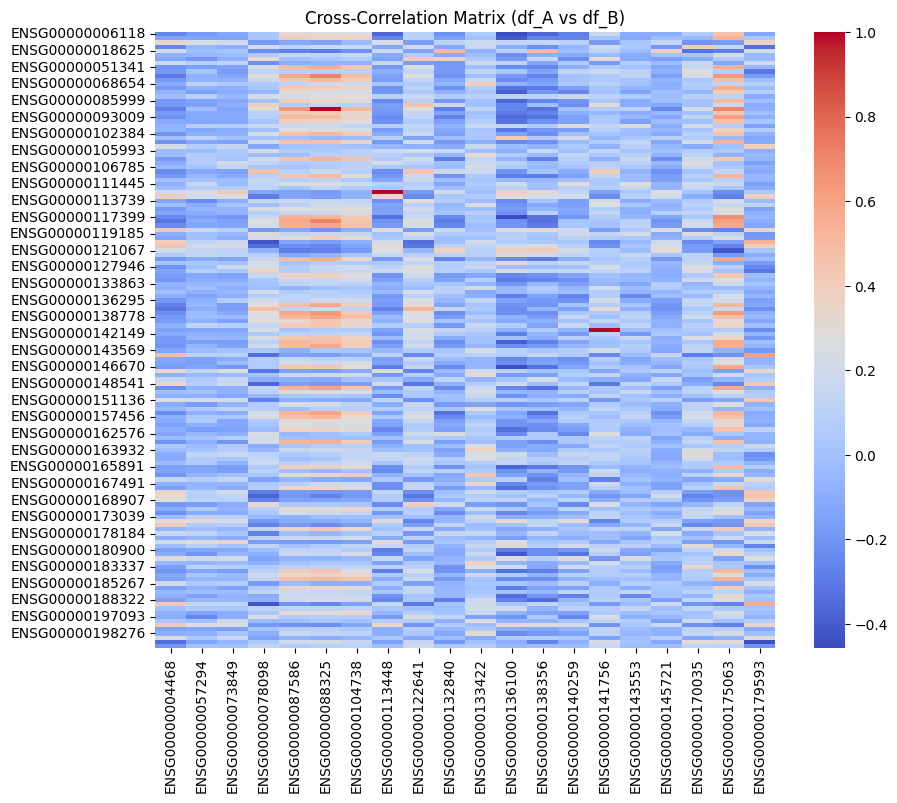

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cross_corr_df, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Cross-Correlation Matrix")
plt.show()

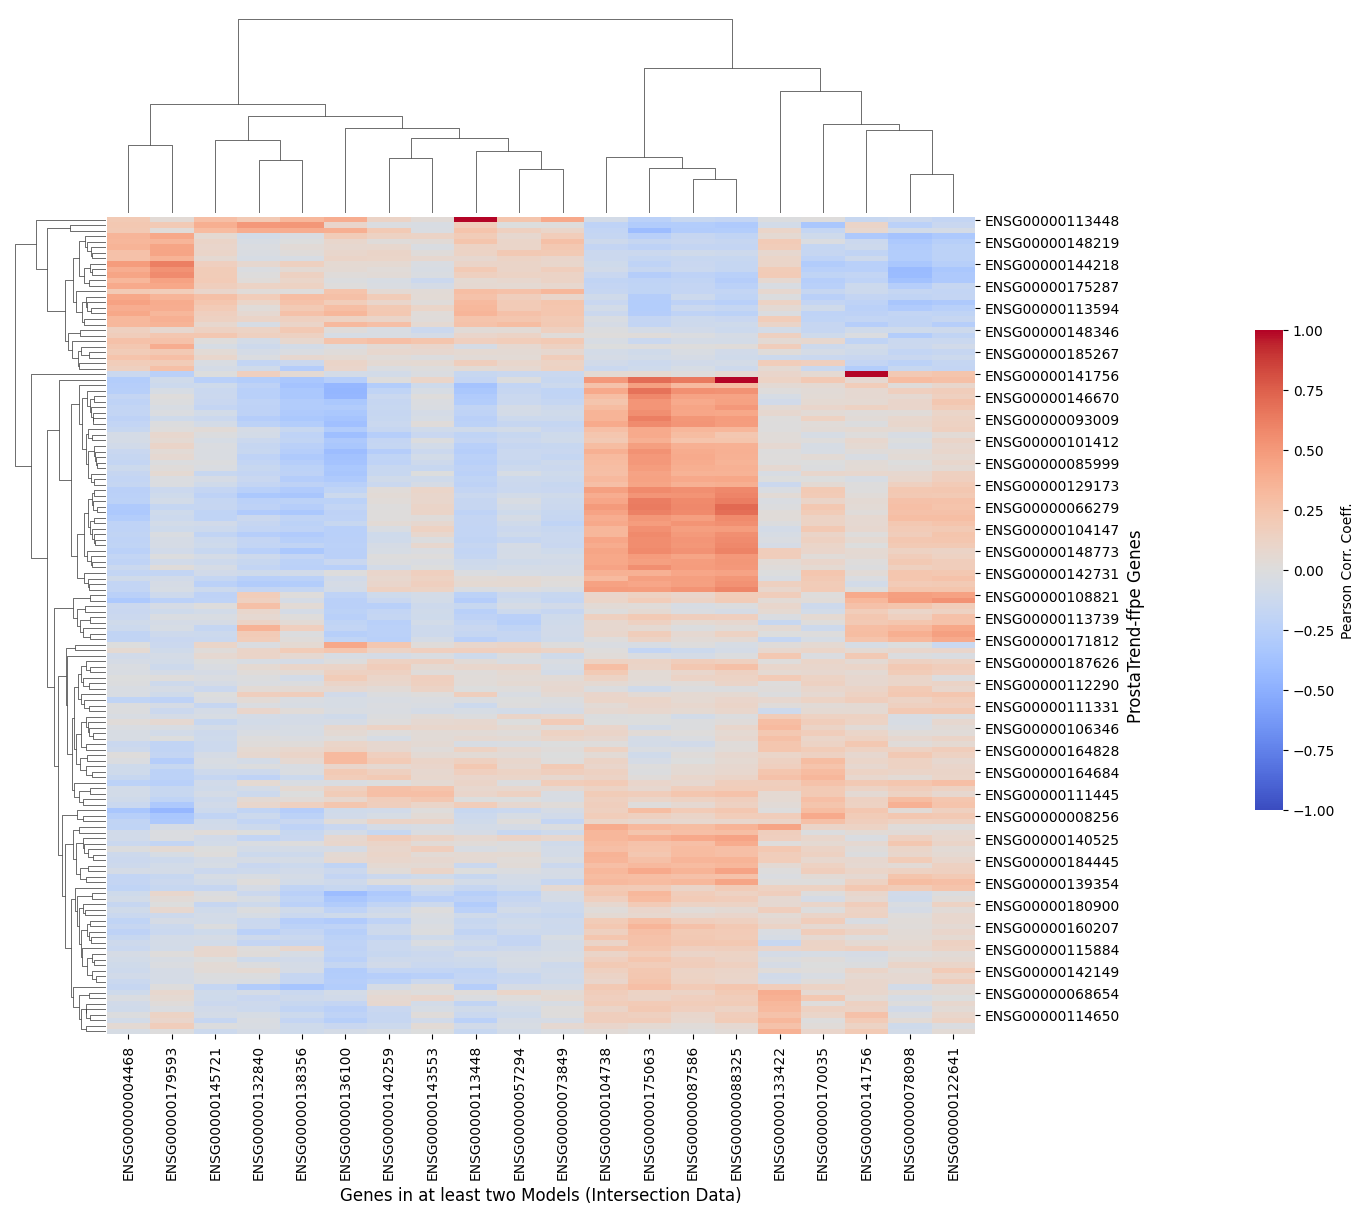

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cluster_map = sns.clustermap(
    cross_corr, annot=False, cmap='coolwarm', fmt = ".1f", figsize=(14, 12), cbar_kws={"label": "Pearson Corr. Coeff."},
    row_cluster=True, col_cluster=True, 
    #cbar_pos=(0.1, 0.1, .01,0.1),
    vmin=-1, vmax=1,     # Force legend to display within [-1, 1]
    dendrogram_ratio=(.1, .2),
)

# Customize axis labels and remove individual feature names
#cluster_map.ax_heatmap.set_xticklabels([])  # Remove x-axis feature names
#cluster_map.ax_heatmap.set_yticklabels([])  # Remove y-axis feature names
cluster_map.ax_heatmap.set_xlabel("Genes in at least two Models (Intersection Data)", fontsize=12, labelpad=5)
cluster_map.ax_heatmap.set_ylabel("ProstaTrend-ffpe Genes", fontsize=12, labelpad=5)
cluster_map.fig.subplots_adjust(right=0.7)
cluster_map.ax_cbar.set_position((0.9, .32, .02, .4))
#cluster_map.cax.set_position([0.5, 0.02, 0.5, 0.02])
cluster_map.cax.tick_params(labelsize=10)
plt.show()
